## Imports und laden des Untergrunds, Mittelwertbestimmung

In [1]:
import matplotlib.pyplot as plt
import numpy as np

unterg = np.loadtxt('Untergrund.dat', usecols=[1])
print(unterg)

mw_unterg=np.mean(4*unterg)
fehler_unterg=np.std(4*unterg)/np.sqrt(len(unterg))
print('Mittelwert:', mw_unterg, 'Fehler:', fehler_unterg)

[2. 4. 5. 4. 1. 4. 5. 4. 5. 3. 2. 3. 8. 1. 3. 4. 2. 5. 2. 5. 3. 3. 6. 2.
 2. 4. 6. 2. 2. 4. 5. 7. 6. 3. 1. 3. 2. 1. 2. 2. 4. 2. 5. 5. 4. 3. 3.]
Mittelwert: 13.957446808510639 Fehler: 0.9543483893077498


# Bestimmung der Zeitkonstante

## Einladen der Messdaten für Ag und graphische Darstellung

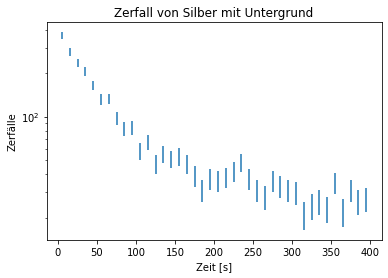

In [2]:
n1 = np.loadtxt('Ag1.dat', usecols=[1])
n2 = np.loadtxt('Ag2.dat', usecols=[1])
n3 = np.loadtxt('Ag3.dat', usecols=[1])
n4 = np.loadtxt('Ag4.dat', usecols=[1])

t=np.arange(5,405,10)

N=n1+n2+n3+n4
Fehler_N=np.sqrt(N)

plt.errorbar(t, N, Fehler_N, linestyle='None')
plt.xlabel('Zeit [s]')

plt.ylabel('Zerfälle')

plt.title('Zerfall von Silber mit Untergrund')
plt.yscale('log')

                

### Graphische Darstellung mit Ausgleichsgerade und betrachtung des Untergrunds

A1= 346.1 , Standardfehler= 15.8
l1= 0.0249 , Standardfehler= 0.0022
A2= 41.6 , Standardfehler= 12.6
l2= 0.0034 , Standardfehler= 0.0011


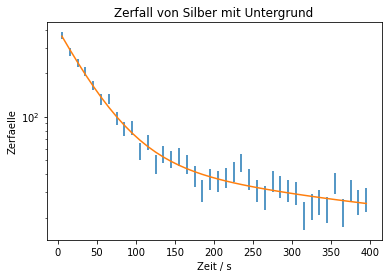

In [3]:
y0 = mw_unterg #Untergrund
def fit_func(x, A1,l1,A2,l2):
    return A1*np.exp(-x*l1) + A2*np.exp(-x*l2) + y0

from scipy.optimize import curve_fit
p0 = [500, 0.02, 50, 0.001]
popt, pcov=curve_fit(fit_func,t,N, p0, sigma=Fehler_N)

plt.errorbar(t,N, Fehler_N, linestyle='None')
plt.xlabel('Zeit / s')
plt.ylabel('Zerfaelle')
plt.title('Zerfall von Silber mit Untergrund')
plt.yscale('log')
plt.plot(t,fit_func(t,*popt))
plt.savefig('Silber1.pdf')

print("A1=",round(popt[0],1), ", Standardfehler=", round(np.sqrt(pcov[0][0]),1))
print("l1=",round(popt[1],4), ", Standardfehler=", round(np.sqrt(pcov[1][1]),4))
print("A2=",round(popt[2],1), ", Standardfehler=", round(np.sqrt(pcov[2][2]),1))
print("l2=",round(popt[3],4), ", Standardfehler=", round(np.sqrt(pcov[3][3]),4))

l1_0 = popt[1]
l2_0 = popt[3]
f_l1_0 = np.sqrt(pcov[1][1])
f_l2_0 = np.sqrt(pcov[1][1])

### Berechnung der Charakteristika des Fits

In [4]:
chi2_=np.sum((fit_func(t, *popt)-N)**2/Fehler_N**2)
dof=len(N)-4 #dof:degrees of freedom, Freiheitsgrad
chi2_red=chi2_/dof

print("chi2=", chi2_)
print("chi2_red=",chi2_red) 

from scipy.stats import chi2
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit=", prob,"%")


chi2= 28.32104042176444
chi2_red= 0.7866955672712345
Wahrscheinlichkeit= 82.0 %


### Addition des Fehlers

A1= 345.4 , Standardfehler= 16.0
l1= 0.0249 , Standardfehler= 0.0022
A2= 41.5 , Standardfehler= 13.3
l2= 0.0036 , Standardfehler= 0.0011


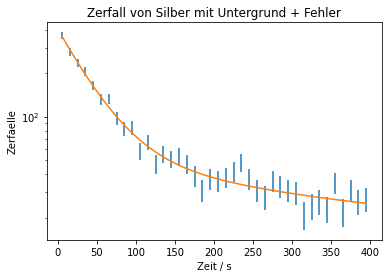

In [5]:
y0 = mw_unterg+fehler_unterg
def fit_func(x, A1,l1,A2,l2):
    return A1*np.exp(-x*l1) + A2*np.exp(-x*l2) + y0

from scipy.optimize import curve_fit
p0 = [500, 0.02, 50, 0.001]
popt, pcov=curve_fit(fit_func,t,N, p0, sigma=Fehler_N)

plt.errorbar(t,N, Fehler_N, linestyle='None')
plt.xlabel('Zeit / s')
plt.ylabel('Zerfaelle')
plt.title('Zerfall von Silber mit Untergrund + Fehler')
plt.yscale('log')
plt.plot(t,fit_func(t,*popt))

print("A1=",round(popt[0],1), ", Standardfehler=", round(np.sqrt(pcov[0][0]),1))
print("l1=",round(popt[1],4), ", Standardfehler=", round(np.sqrt(pcov[1][1]),4))
print("A2=",round(popt[2],1), ", Standardfehler=", round(np.sqrt(pcov[2][2]),1))
print("l2=",round(popt[3],4), ", Standardfehler=", round(np.sqrt(pcov[3][3]),4))

l1_0 = popt[1]
l2_0 = popt[3]
f_l1_0 = np.sqrt(pcov[1][1])
f_l2_0 = np.sqrt(pcov[1][1])

In [6]:
chi2_=np.sum((fit_func(t, *popt)-N)**2/Fehler_N**2)
dof=len(N)-4 #dof:degrees of freedom, Freiheitsgrad
chi2_red=chi2_/dof

print("chi2=", chi2_)
print("chi2_red=",chi2_red)

from scipy.stats import chi2
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit=", prob,"%")

chi2= 28.332663427791978
chi2_red= 0.7870184285497772
Wahrscheinlichkeit= 82.0 %


#### Speichern der Maxima

In [7]:
l1_plu = popt[1]
l2_plu = popt[3]
f_l1_plu = np.sqrt(pcov[1][1])
f_l2_plu = np.sqrt(pcov[3][3])

### Abzug des Fehlers

A1= 346.8 , Standardfehler= 15.6
l1= 0.0248 , Standardfehler= 0.0021
A2= 41.9 , Standardfehler= 12.0
l2= 0.0032 , Standardfehler= 0.001


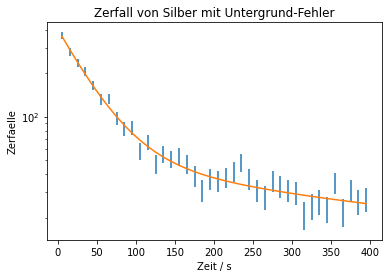

In [8]:
y0 = mw_unterg-fehler_unterg
def fit_func(x, A1,l1,A2,l2):
    return A1*np.exp(-x*l1) + A2*np.exp(-x*l2) + y0

from scipy.optimize import curve_fit
p0 = [500, 0.02, 50, 0.001]
popt, pcov=curve_fit(fit_func,t,N, p0, sigma=Fehler_N)

plt.errorbar(t,N, Fehler_N, linestyle='None')
plt.xlabel('Zeit / s')
plt.ylabel('Zerfaelle')
plt.title('Zerfall von Silber mit Untergrund-Fehler')
plt.yscale('log')
plt.plot(t,fit_func(t,*popt))

print("A1=",round(popt[0],1), ", Standardfehler=", round(np.sqrt(pcov[0][0]),1))
print("l1=",round(popt[1],4), ", Standardfehler=", round(np.sqrt(pcov[1][1]),4))
print("A2=",round(popt[2],1), ", Standardfehler=", round(np.sqrt(pcov[2][2]),1))
print("l2=",round(popt[3],4), ", Standardfehler=", round(np.sqrt(pcov[3][3]),4))

l1_0 = popt[1]
l2_0 = popt[3]
f_l1_0 = np.sqrt(pcov[1][1])
f_l2_0 = np.sqrt(pcov[1][1])

### Berechnung der Charakteristika des Fits

In [9]:
chi2_=np.sum((fit_func(t, *popt)-N)**2/Fehler_N**2)
dof=len(N)-4 #dof:degrees of freedom, Freiheitsgrad
chi2_red=chi2_/dof

print("chi2=", chi2_)
print("chi2_red=",chi2_red)

from scipy.stats import chi2
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit=", prob,"%")

chi2= 28.311783773032968
chi2_red= 0.7864384381398046
Wahrscheinlichkeit= 82.0 %


#### Speichern der Minima

In [10]:
l1_min = popt[1]
l2_min = popt[3]
f_l1_min = np.sqrt(pcov[1][1])
f_l2_min = np.sqrt(pcov[3][3])

### Berechnung des Fehlers

In [11]:
d1_l1 = abs(l1_0 - l1_min)
d2_l1 = abs(l1_0 - l1_plu)
d1_l2 = abs(l2_0 - l2_min)
d2_l2 = abs(l2_0 - l2_plu)
f_l1 = np.sqrt(((d1_l1+d2_l1)/2)**2+(f_l1_0)**2)
f_l2 = np.sqrt(((d1_l2+d2_l2)/2)**2+(f_l2_0)**2)

print('Zerfallskonstantenfehler l1:', f_l1, 'Zerfallskonstantenfehler l2:', f_l2)

Zerfallskonstantenfehler l1: 0.0021115029323168243 Zerfallskonstantenfehler l2: 0.002119903810450295


In [12]:
T_1 = np.log(2)/l1_0
f_T_1 = f_l1*np.log(2)/(l1_0**2)
T_2 = np.log(2)/l2_0
f_T_2 = f_l2*np.log(2)/(l2_0**2)

print('Halbwertszeit AG110=',T_1,'+-',f_T_1)
print('Halbwertszeit AG108=',T_2,'+-',f_T_2)


Halbwertszeit AG110= 27.940407838207708 +- 2.3781087454814096
Halbwertszeit AG108= 218.4742397618491 +- 145.97926343330383


In [13]:
tau_AG110 = 1/T_1
f_tau_AG110 = f_T_1/(T_1**2)
tau_AG108 = 1/T_2
f_tau_AG108 = f_T_2/(T_2**2)

print('tau_AG110=',tau_AG110,'+-',f_tau_AG110)
print('tau_AG108=',tau_AG108,'+-',f_tau_AG108)

tau_AG110= 0.03579045824207794 +- 0.0030462548092759878
tau_AG108= 0.004577198671523306 +- 0.003058374714498257


# Indium Zerfall

[24. 48. 60. 48. 12. 48. 60. 48. 60. 36. 24. 36. 96. 12. 36. 48. 24. 60.
 24. 60. 36. 36. 72. 24. 24. 48. 72. 24. 24. 48. 60. 84. 72. 36. 12. 36.
 24. 12. 24. 24. 48. 24. 60. 60. 48. 36. 36.]
Mittelwert: 41.87234042553192 Fehler: 2.8630451679232496


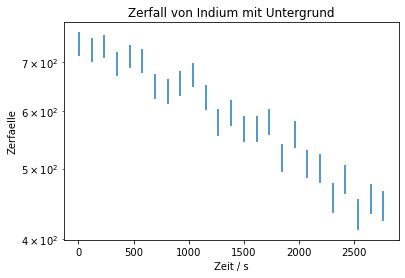

In [14]:
unterg = np.loadtxt('Untergrund.dat', usecols=[1])*12
print(unterg)

mw_unterg=np.mean(unterg)
fehler_unterg=np.std(unterg)/np.sqrt(len(unterg))
print('Mittelwert:', mw_unterg, 'Fehler:', fehler_unterg)
n1 = np.loadtxt('In1.dat', usecols=[1])

N=n1
Fehler_N=np.sqrt(N)

t=np.arange(5,2880,115)

plt.errorbar(t, N, Fehler_N, linestyle='None')
plt.xlabel('Zeit / s')

plt.ylabel('Zerfaelle')

plt.title('Zerfall von Indium mit Untergrund')
plt.yscale('log')

### Ausgleichsgerade

A1= 729.6781327901697 , Standartfehler= 11.409087849049756
l1= 0.00021440960466942893 , Standartfehler= 1.0282710258966877e-05


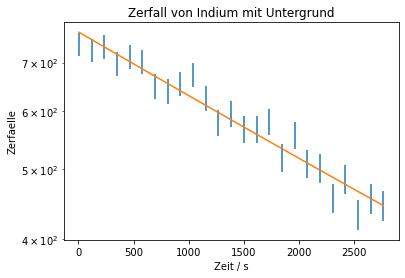

In [15]:
y0=mw_unterg #Untergrund Indium
def fit_func(x, A1,l1):
    return A1*np.exp(-x*l1) + y0

p0 = [680, 0.0002]
popt, pcov=curve_fit(fit_func,t[1:],N[1:], p0, sigma=Fehler_N[1:])

plt.errorbar(t,N, Fehler_N, linestyle='None')
plt.xlabel('Zeit / s')
plt.ylabel('Zerfaelle')
plt.title('Zerfall von Indium mit Untergrund')
plt.yscale('log')
plt.plot(t, fit_func(t, *popt))
plt.savefig('Indium1.pdf')



print("A1=",popt[0], ", Standartfehler=", np.sqrt(pcov[0][0]))
print("l1=",popt[1], ", Standartfehler=", np.sqrt(pcov[1][1]))

l_0 = popt[1]
f_l_0 = np.sqrt(pcov[1][1])

### Berechnung der Charakteristika des Fits

In [16]:
chi2_=np.sum((fit_func(t,*popt)-N)**2/Fehler_N**2)
dof=len(N)-2 #dof:degrees of freedom, Freiheitsgrad
chi2_red=chi2_/dof
      
print("chi2=", chi2_)
print("chi2_red=",chi2_red)
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("wahrscheinlichkeit=", prob,"%")

chi2= 18.812875964287013
chi2_red= 0.817951128882044
wahrscheinlichkeit= 71.0 %


### Adition des Fehlers

A1_plu= 726.9089456971919 , Standartfehler= 11.426241454973267
l1_plu= 0.00021554278097788877 , Standartfehler= 0.00010346222633056648


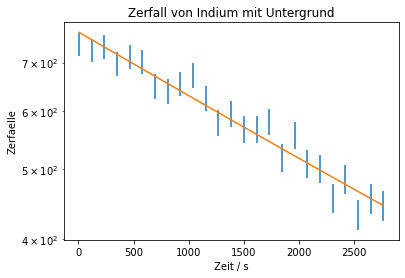

In [17]:
y0=mw_unterg+fehler_unterg #Untergrund Indium+F
def fit_func(x, A1,l1):
    return A1*np.exp(-x*l1) + y0

p0 = [680, 0.0002]
popt, pcov=curve_fit(fit_func,t[1:],N[1:], p0, sigma=Fehler_N[1:])

plt.errorbar(t,N, Fehler_N, linestyle='None')
plt.xlabel('Zeit / s')
plt.ylabel('Zerfaelle')
plt.title('Zerfall von Indium mit Untergrund')
plt.yscale('log')
plt.plot(t, fit_func(t, *popt))


print("A1_plu=",popt[0], ", Standartfehler=", np.sqrt(pcov[0][0]))
print("l1_plu=",popt[1], ", Standartfehler=", 10*np.sqrt(pcov[1][1]))

l_plu = popt[1]
f_l_plu = np.sqrt(pcov[1][1])



### Berechnung der Charakteristika des Fits

In [18]:
chi2_=np.sum((fit_func(t,*popt)-N)**2/Fehler_N**2)
dof=len(N)-2 #dof:degrees of freedom, Freiheitsgrad
chi2_red=chi2_/dof
      
print("chi2=", chi2_)
print("chi2_red=",chi2_red)
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("wahrscheinlichkeit=", prob,"%")

chi2= 18.844437822979618
chi2_red= 0.8193233836078094
wahrscheinlichkeit= 71.0 %


### Abzug des Fehlers

A1_min= 732.4482372645722 , Standartfehler= 11.392160361196552
l1_min= 0.00021328821090894383 , Standartfehler= 1.022000020847493e-05


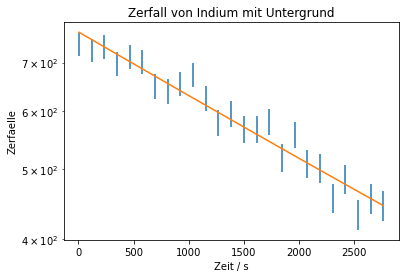

In [19]:
y0=mw_unterg-fehler_unterg #Untergrund Indium+F
def fit_func(x, A1,l1):
    return A1*np.exp(-x*l1) + y0

p0 = [680, 0.0002]
popt, pcov=curve_fit(fit_func,t[1:],N[1:], p0, sigma=Fehler_N[1:])

plt.errorbar(t,N, Fehler_N, linestyle='None')
plt.xlabel('Zeit / s')
plt.ylabel('Zerfaelle')
plt.title('Zerfall von Indium mit Untergrund')
plt.yscale('log')
plt.plot(t, fit_func(t, *popt))


print("A1_min=",popt[0], ", Standartfehler=", np.sqrt(pcov[0][0]))
print("l1_min=",popt[1], ", Standartfehler=", np.sqrt(pcov[1][1]))

l_min = popt[1]
f_l_min = np.sqrt(pcov[1][1])



### Berechnung der Charakteristika des Fits

In [20]:
chi2_=np.sum((fit_func(t,*popt)-N)**2/Fehler_N**2)
dof=len(N)-2 #dof:degrees of freedom, Freiheitsgrad
chi2_red=chi2_/dof
      
print("chi2=", chi2_)
print("chi2_red=",chi2_red)
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("wahrscheinlichkeit=", prob,"%")

chi2= 18.78177834536769
chi2_red= 0.8165990584942474
wahrscheinlichkeit= 71.0 %


### Berechnung des Fehlers

In [21]:
d1_l = abs(l_0-l_min)
d2_l = abs(l_0-l_plu)

f_l = np.sqrt(((d1_l+d2_l)/2)**2+(f_l_0)**2)

print('Zerfallsfehler:', f_l)

Zerfallsfehler: 1.0344317368430275e-05


In [22]:
T = np.log(2)/l_0
f_T = f_l_0*np.log(2)/(l_0**2)

print('Halbwertszeit In=',T,'+-',f_T)

Halbwertszeit In= 3232.8177724529705 +- 155.04029553818003


In [23]:
tau_In = 1/T
f_tau_In = f_T/(T**2)

print('tau_In=',tau_AG110,'+-',f_tau_AG110)

tau_In= 0.03579045824207794 +- 0.0030462548092759878
